<h1 align = 'center'> Fashion Class Classification </h1>

### Problem Statement and Bussiness Case

Fashion Training consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28 X 28 grayscale image,, addociated with a label from 10 classes.

The 10 classes decoding is as follows:
 * 0 => T-shirt/top
 * 1 => Trouser
 * 2 => Pullover
 * 3 => Dress
 * 4 => Coat
 * 5 => Sandal
 * 6 => Shirt
 * 7 => Sneaker
 * 8 => Bag
 * 9 => Ankle boot

 Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

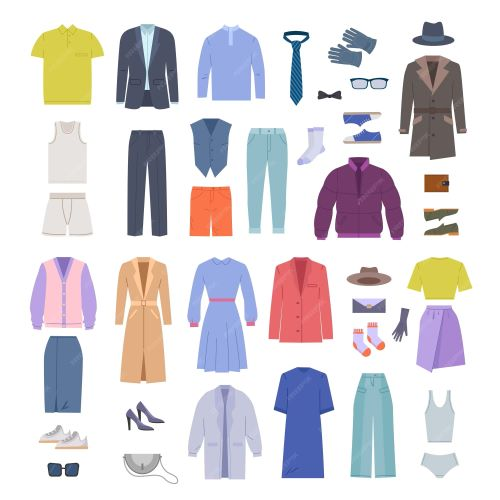

### Importing data

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

In [88]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep =',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep = ',')

## Visualization of the Dataset

In [89]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [93]:
fashion_train_df.shape

(60000, 785)

In [94]:
fashion_test_df.shape

(10000, 785)

In [95]:
training = np.array(fashion_train_df ,dtype='float32')

In [96]:
testing = np.array(fashion_test_df, dtype = 'float32')

8.0

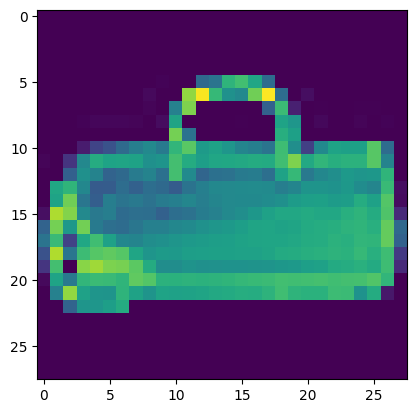

In [97]:
i = random.randint(0,59999)
plt.imshow(training[i, 1:].reshape(28,28) )
label = training[i,0]
label
# The 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

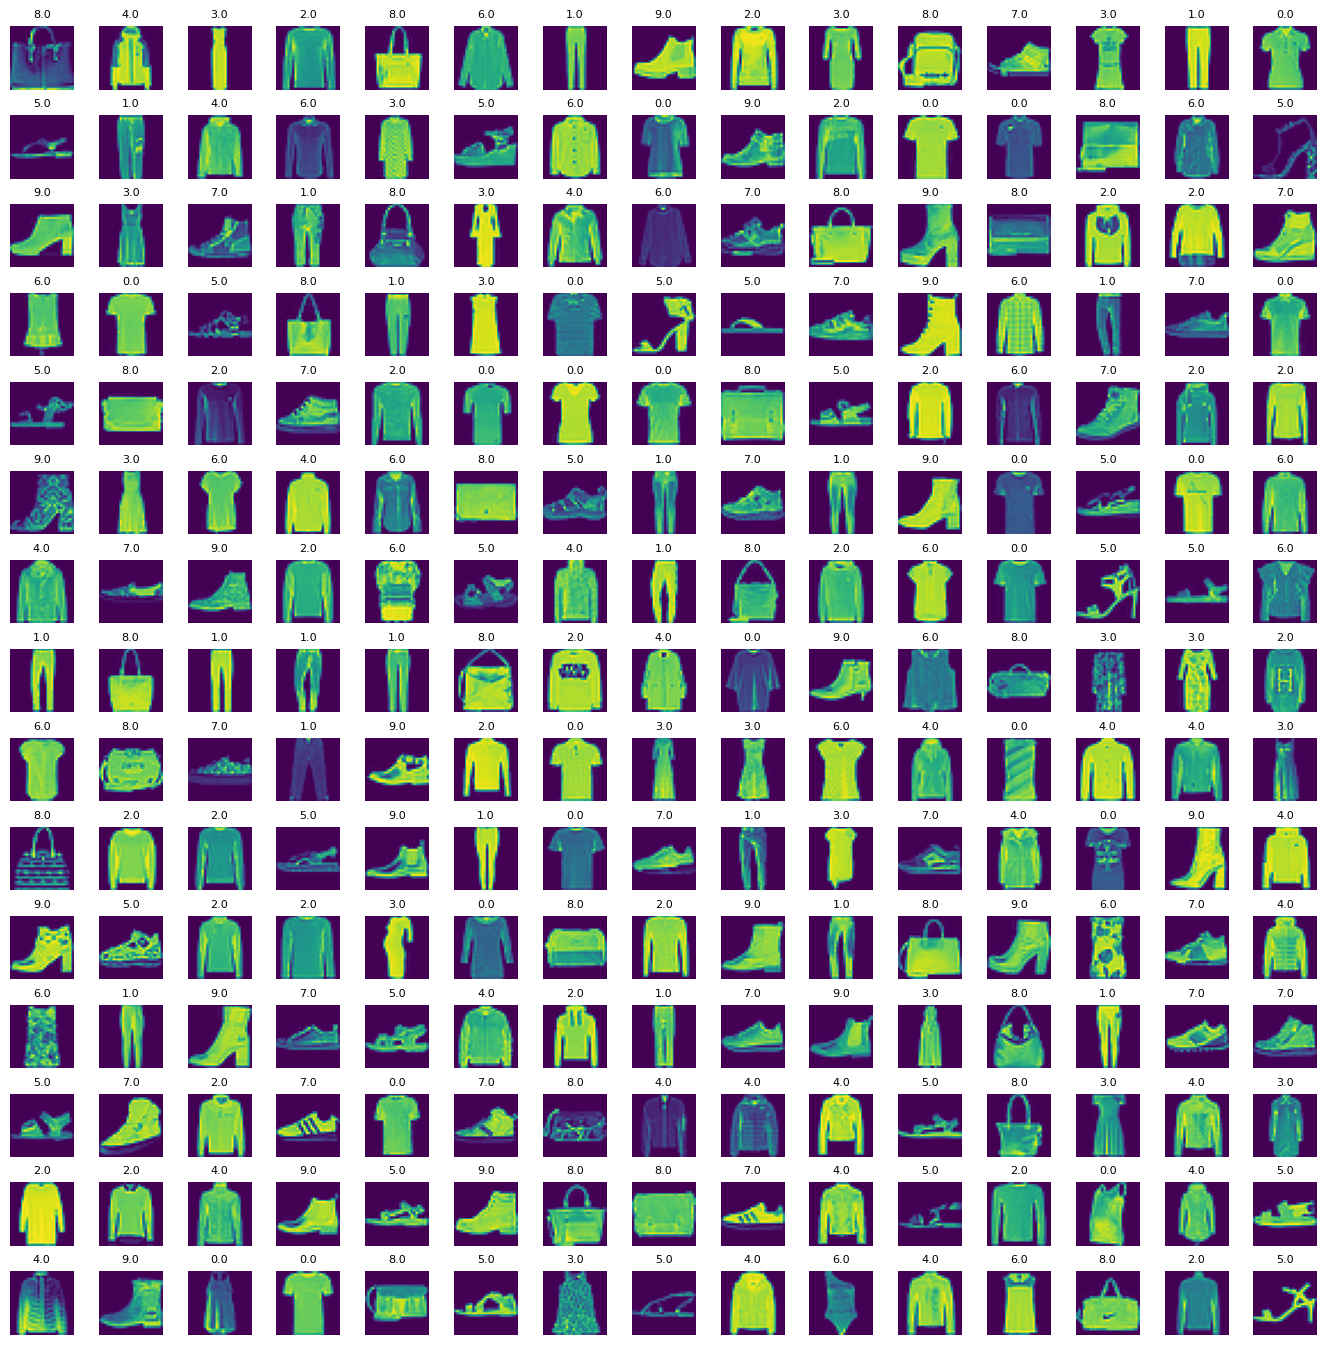

In [98]:
# Let's view more impages in grid format
#Define the dimensions of the plot
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot returns the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 X 15 matrix into 225 arrays

n_training = len(training) # Get the length of training data set

# Select a random number btw 0 and n_training
for i in np.arange(0, W_grid*L_grid): # create evenly spaces variables

    # Select a random number 
    index = random.randint(0, n_training)
    # Read and display and image with selected index
    axes[i].imshow(training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

# The 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot



## Training the model

In [99]:
# Prepare the training and testing data

X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:, 1:]/255

y_test = testing[:, 0]

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train , test_size= 0.2 , random_state= 12345)


In [101]:
X_train.shape

(48000, 784)

In [102]:
y_train.shape

(48000,)

In [103]:
# *unpack the tuple 
X_train = X_train.reshape(X_train.shape[0],*(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [104]:
X_train.shape

(48000, 28, 28, 1)

In [105]:
X_test.shape

(10000, 28, 28, 1)

In [106]:
X_validate.shape

(12000, 28, 28, 1)

In [107]:
import keras

In [108]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [133]:
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    MaxPool2D(pool_size= (2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(units= 32 , activation = 'relu'),
    Dense(units = 10 , activation = 'sigmoid')

])

In [134]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [135]:
epochs = 50

In [136]:
X_train.shape

(48000, 28, 28, 1)

In [137]:
y_train.shape

(48000,)

In [138]:
model.fit(X_train, y_train, batch_size=500, epochs=50, verbose=1, validation_data=(X_validate, y_validate))


Epoch 1/50


96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - accuracy: 0.6291 - loss: 1.0858 - val_accuracy: 0.8432 - val_loss: 0.4445
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.8510 - loss: 0.4272 - val_accuracy: 0.8720 - val_loss: 0.3685
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.8710 - loss: 0.3676 - val_accuracy: 0.8741 - val_loss: 0.3478
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.8869 - loss: 0.3278 - val_accuracy: 0.8892 - val_loss: 0.3130
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.8934 - loss: 0.3082 - val_accuracy: 0.8910 - val_loss: 0.3052
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.8988 - loss: 0.2971 - val_accuracy: 0.8916 - val_loss: 0.3035
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.8985 - loss: 0.2849 - val_accuracy: 0.9029 - val_loss: 0.2777
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.9028 - loss: 0.2707 - val_accuracy: 0.903

## Evaluating the model

In [149]:
evaluation = model.evaluate(X_test, y_test)
print("Test Accuracy : {:.3f}". format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9176 - loss: 0.2555
Test Accuracy : 0.923


In [150]:
# Assuming model.predict returns probabilities for each class
probabilities = model.predict(X_test)
predicted_classes = np.argmax(probabilities, axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [151]:
probabilities

array([[9.9999982e-01, 5.1646725e-07, 9.9667370e-01, ..., 6.4201267e-05,
        8.0700040e-02, 3.1126629e-12],
       [9.8129880e-01, 1.0000000e+00, 5.2850276e-02, ..., 6.6305714e-05,
        9.0575598e-02, 9.3520362e-07],
       [9.9984896e-01, 3.3538723e-05, 9.9997318e-01, ..., 6.0260213e-08,
        1.2563702e-04, 1.0807088e-04],
       ...,
       [4.9403880e-02, 3.9511804e-02, 6.2995541e-01, ..., 1.2535234e-01,
        1.0000000e+00, 1.3998233e-06],
       [9.9352592e-01, 3.5920251e-02, 4.9606306e-03, ..., 9.2476833e-04,
        1.0000000e+00, 4.7943234e-03],
       [8.0474608e-02, 9.9994349e-01, 9.4023186e-01, ..., 8.5947045e-07,
        6.3515776e-01, 3.9919425e-04]], dtype=float32)

In [152]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

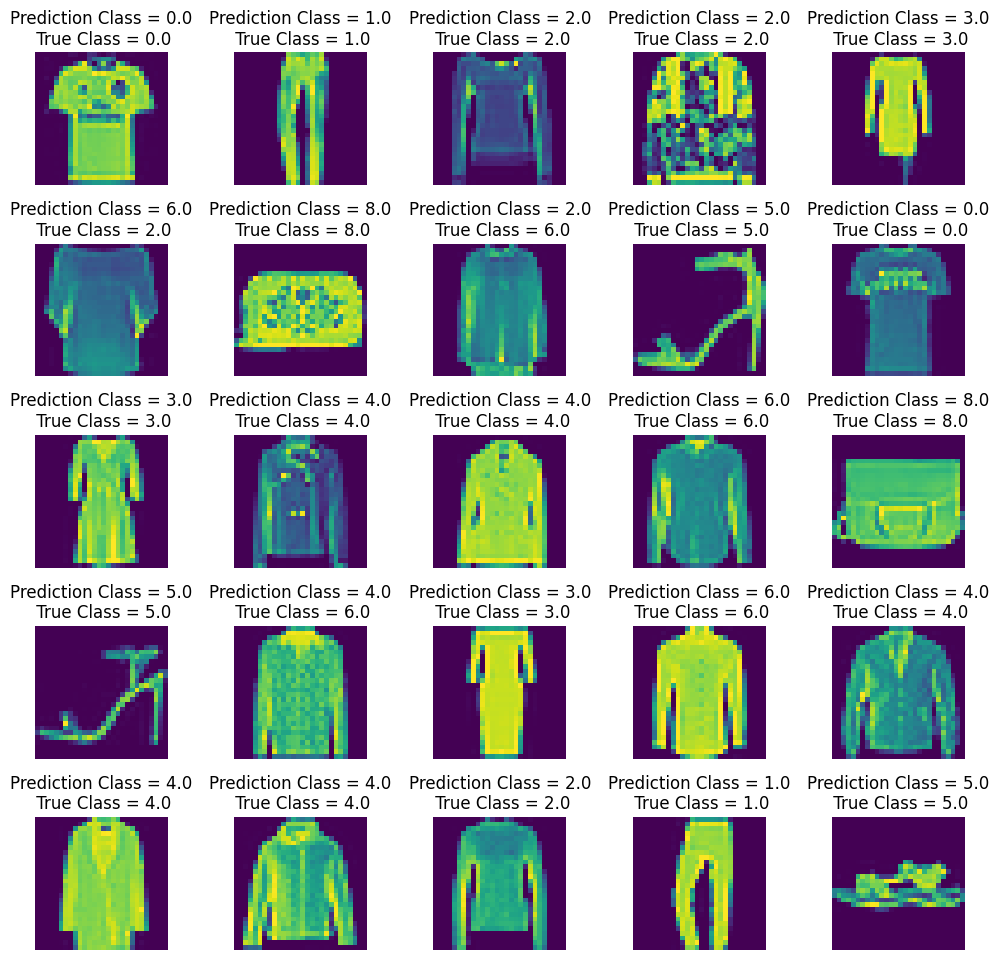

In [153]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace = 0.5)

In [154]:
from sklearn.metrics import confusion_matrix


<Axes: >

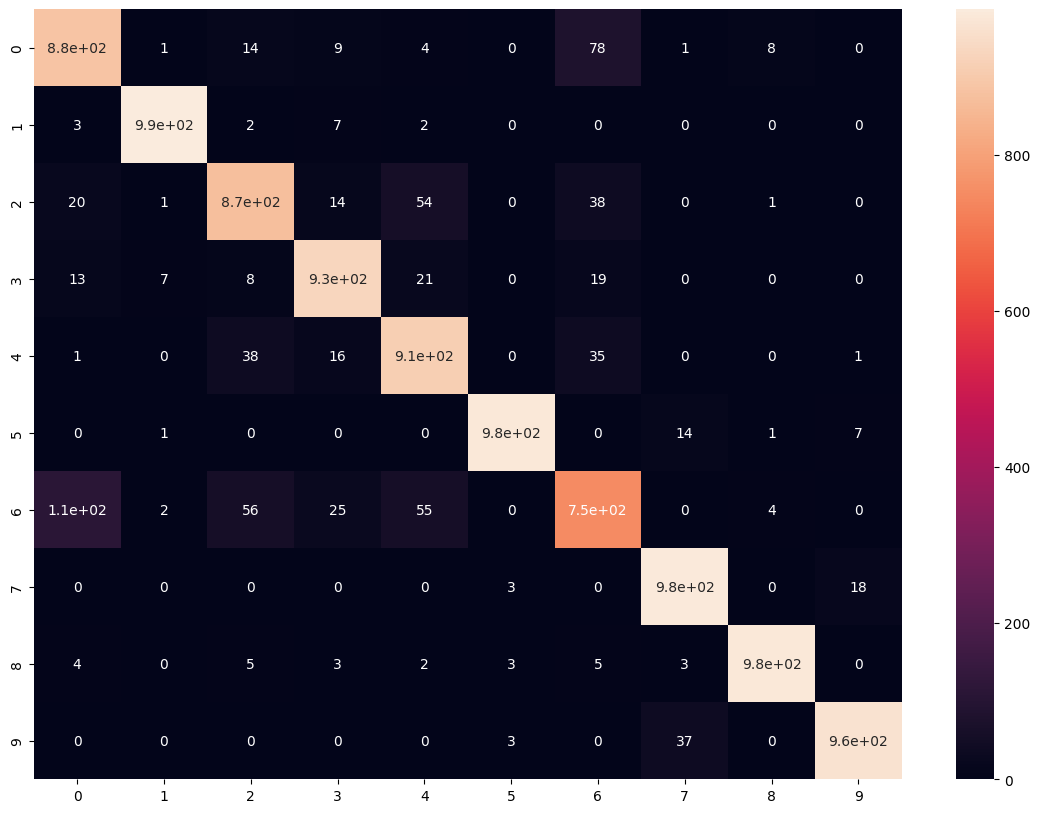

In [155]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)
# Sum the diagonal elements  to get the total true correct values

In [156]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [157]:
print("The test accuracy score is ", accuracy_score(y_test, predicted_classes))

The test accuracy score is  0.9225


In [158]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.89      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.87      0.87      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.87      0.91      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.75      0.78      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

